In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import statistics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer


In [3]:
expert_data = pd.read_csv('2ex13.csv')
expert_data.head()

time = expert_data.iloc[:,0]
expert_data.columns.get_loc('Input_Slew RealValue')
#expert_data.columns.get_loc('DS_BoomCylinderPressureA')
#expert_data.loc[expert_data['DS_Fuel_Meter'].idxmax()]

inter_data = pd.read_csv('1int13.csv')
intertime = inter_data.iloc[:,0]

novice_data = pd.read_csv('2int13.csv')
novicetime = novice_data.iloc[:,0]
expert_data.columns.get_loc('DS_BoomCylinderPressureB')

31

In [366]:
#Data Preparation 
# https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

scaler = preprocessing.StandardScaler()
expert_data = scaler.fit_transform(expert_data)
expert_data = preprocessing.normalize(expert_data)

expert_data = pd.DataFrame(expert_data)

# https://stackoverflow.com/questions/48888001/creating-multiple-dataframes-with-a-loop
# https://www.neural-networks.io/en/python/dataframes.php

expert_data.head()

scaler = preprocessing.StandardScaler()
inter_data = scaler.fit_transform(inter_data)
inter_data = preprocessing.normalize(inter_data)

inter_data = pd.DataFrame(inter_data)

scaler = preprocessing.StandardScaler()
novice_data = scaler.fit_transform(novice_data)
novice_data = preprocessing.normalize(novice_data)

novice_data = pd.DataFrame(novice_data)

C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\wsjr\AppData\Local\

In [74]:

Xe_train = expert_data.drop([28])
ye_train = expert_data.iloc[:,28]

Xe_test = expertv_data.drop([28])
ye_test = expertv_data.iloc[:,28]

Xn_train = novice_data.drop([28]) #removed 25,26,27
yn_train = novice_data.iloc[:,28] #removed 25:29

Xn_test = novicev_data.drop([28])
yn_test = novicev_data.iloc[:,28]


NameError: name 'expertv_data' is not defined

In [351]:
joysticks = expert_data.iloc[:,25:29]
joysticks.head()

interjoysticks = inter_data.iloc[:,25:29]
joysticks.head()

novicejoysticks = novice_data.iloc[:,25:29]
joysticks.head()

,25,26,27,28
0,-0.155052,0.004519,-0.030746,0.004215
1,-0.145536,0.004241,0.044259,-0.124683
2,-0.147602,0.004302,0.044887,-0.126455
3,-0.134191,0.003911,0.040809,-0.114966
4,-0.122378,0.003567,0.055681,-0.151427


In [260]:
Slew = joysticks.iloc[0:1000,0]
Boom = joysticks.iloc[0:1000,1]
Dipper = joysticks.iloc[0:1000,2]
Bucket = joysticks.iloc[0:1000,3]

iSlew = interjoysticks.iloc[0:1000,0]
iBoom = interjoysticks.iloc[0:1000,1]
iDipper = interjoysticks.iloc[0:1000,2]
iBucket = interjoysticks.iloc[0:1000,3]

nSlew = novicejoysticks.iloc[0:1000,0]
nBoom = novicejoysticks.iloc[0:1000,1]
nDipper = novicejoysticks.iloc[0:1000,2]
nBucket = novicejoysticks.iloc[0:1000,3]

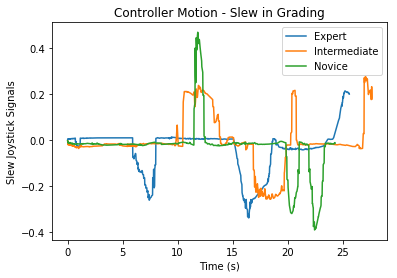

In [265]:
#Line graphs
time = expert_data.iloc[0:1000,0]
intertime = inter_data.iloc[0:1000,0]
novicetime = novice_data.iloc[0:1000,0]
plt.plot(time,Slew,label='Expert')
plt.plot(intertime,iSlew,label='Intermediate')
plt.plot(novicetime,nSlew,label='Novice')
plt.xlabel('Time (s)')
plt.ylabel('Slew Joystick Signals')
plt.title('Controller Motion - Slew in Grading')
plt.legend(loc='upper right')
plt.show()

In [270]:
Slew = joysticks.iloc[:,0]
Boom = joysticks.iloc[:,1]
Dipper = joysticks.iloc[:,2]
Bucket = joysticks.iloc[:,3]

iSlew = interjoysticks.iloc[:,0]
iBoom = interjoysticks.iloc[:,1]
iDipper = interjoysticks.iloc[:,2]
iBucket = interjoysticks.iloc[:,3]

nSlew = novicejoysticks.iloc[:,0]
nBoom = novicejoysticks.iloc[:,1]
nDipper = novicejoysticks.iloc[:,2]
nBucket = novicejoysticks.iloc[:,3]

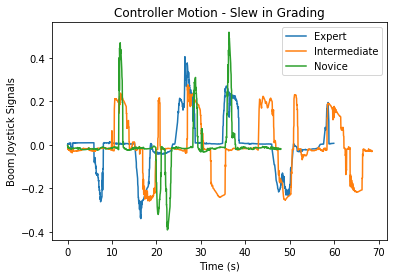

In [272]:
#Line graphs
time = expert_data.iloc[:,0]
intertime = inter_data.iloc[:,0]
novicetime = novice_data.iloc[:,0]
plt.plot(time,Slew,label='Expert')
plt.plot(intertime,iSlew,label='Intermediate')
plt.plot(novicetime,nSlew,label='Novice')
plt.xlabel('Time (s)')
plt.ylabel('Boom Joystick Signals')
plt.title('Controller Motion - Slew in Grading')
plt.legend(loc='upper right')
plt.show()

In [ ]:
k_range = range(1,11)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))


In [ ]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

classes = {0:'Expert',1:'Intermediate',2:'Novice'}

x_new = [[],[]]

y_predict = knn.predict(x_new)
knn.score(X_test,y_test)
accuracy_score(y_test,y_pred)

print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classification_report(y_test,y_pred))

In [8]:
Boom_Pressure_A= expert_data.iloc[:,32]
Boom_Pressure_B= expert_data.iloc[:,31]
Dipper_Pressure_A= expert_data.iloc[:,33]
Dipper_Pressure_B= expert_data.iloc[:,34]
Bucket_Pressure_A= expert_data.iloc[:,35]
Bucket_Pressure_B= expert_data.iloc[:,36]

In [9]:
iBoom_Pressure_A= inter_data.iloc[:,32]
iBoom_Pressure_B= inter_data.iloc[:,31]
iDipper_Pressure_A= inter_data.iloc[:,33]
iDipper_Pressure_B= inter_data.iloc[:,34]
iBucket_Pressure_A= inter_data.iloc[:,35]
iBucket_Pressure_B= inter_data.iloc[:,36]

In [10]:
nBoom_Pressure_A= novice_data.iloc[:,32]
nBoom_Pressure_B= novice_data.iloc[:,31]
nDipper_Pressure_A= novice_data.iloc[:,33]
nDipper_Pressure_B= novice_data.iloc[:,34]
nBucket_Pressure_A= novice_data.iloc[:,35]
nBucket_Pressure_B= novice_data.iloc[:,36]

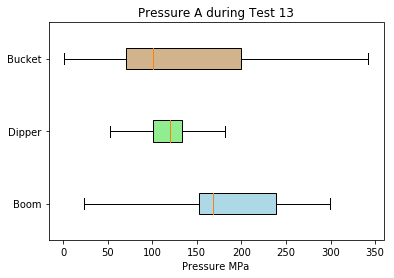

In [11]:
#Box plot

box_plot_data = [Boom_Pressure_A,Dipper_Pressure_A,Bucket_Pressure_A]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Boom','Dipper','Bucket'],showfliers=False)
plt.title('Pressure A during Test 13')
plt.xlabel('Pressure MPa')
colors=['lightblue','lightgreen','tan']

for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

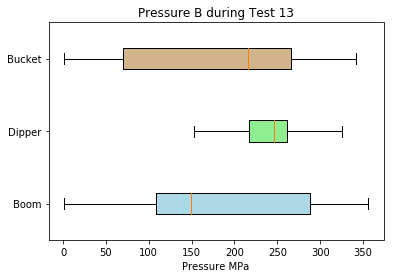

In [19]:
#Box plot

box_plot_data = [Boom_Pressure_B,Dipper_Pressure_B,Bucket_Pressure_B]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Boom','Dipper','Bucket'],showfliers=False)
plt.title('Pressure B during Test 13')
plt.xlabel('Pressure MPa')
colors=['lightblue','lightgreen','tan']

for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

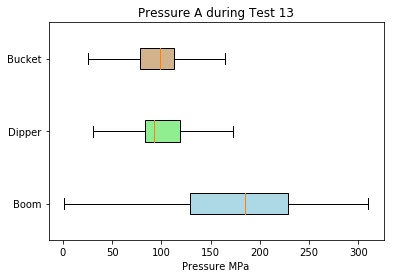

In [13]:
#Box plot

box_plot_data = [iBoom_Pressure_A,iDipper_Pressure_A,iBucket_Pressure_A]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Boom','Dipper','Bucket'],showfliers=False)
plt.title('Pressure A during Test 13')
plt.xlabel('Pressure MPa')
colors=['lightblue','lightgreen','tan']

for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

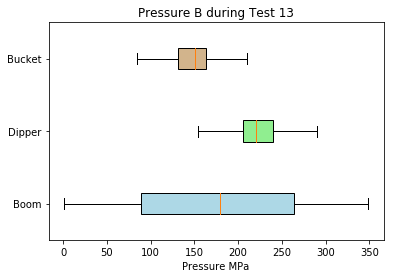

In [18]:
#Box plot

box_plot_data = [iBoom_Pressure_B,iDipper_Pressure_B,iBucket_Pressure_B]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Boom','Dipper','Bucket'],showfliers=False)
plt.title('Pressure B during Test 13')
plt.xlabel('Pressure MPa')
colors=['lightblue','lightgreen','tan']

for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

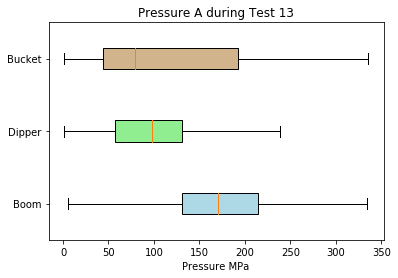

In [15]:
#Box plot

box_plot_data = [nBoom_Pressure_A,nDipper_Pressure_A,nBucket_Pressure_A]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Boom','Dipper','Bucket'],showfliers=False)
plt.title('Pressure A during Test 13')
plt.xlabel('Pressure MPa')
colors=['lightblue','lightgreen','tan']

for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

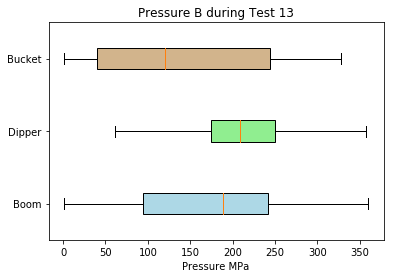

In [17]:
#Box plot

box_plot_data = [nBoom_Pressure_B,nDipper_Pressure_B,nBucket_Pressure_B]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Boom','Dipper','Bucket'],showfliers=False)
plt.title('Pressure B during Test 13')
plt.xlabel('Pressure MPa')
colors=['lightblue','lightgreen','tan']

for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

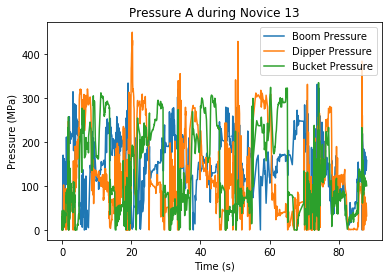

In [24]:
time = novice_data.iloc[:,0]
plt.figure()
plt.plot(time,nBoom_Pressure_A)
plt.plot(time,nDipper_Pressure_A)
plt.plot(time,nBucket_Pressure_A)
plt.title('Pressure A during Novice 13')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend(['Boom Pressure','Dipper Pressure','Bucket Pressure'],loc='upper right')
plt.show()

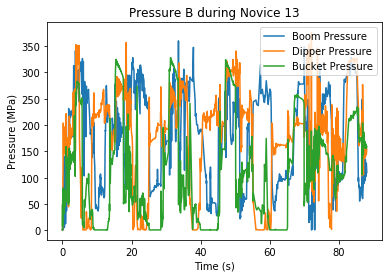

In [25]:
time = novice_data.iloc[:,0]
plt.figure()
plt.plot(time,nBoom_Pressure_B)
plt.plot(time,nDipper_Pressure_B)
plt.plot(time,nBucket_Pressure_B)
plt.title('Pressure B during Novice 13')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend(['Boom Pressure','Dipper Pressure','Bucket Pressure'],loc='upper right')
plt.show()

In [26]:
Boom_Pressure_A= expert_data.iloc[0:1000,32]
Boom_Pressure_B= expert_data.iloc[0:1000,31]
Dipper_Pressure_A= expert_data.iloc[0:1000,33]
Dipper_Pressure_B= expert_data.iloc[0:1000,34]
Bucket_Pressure_A= expert_data.iloc[0:1000,35]
Bucket_Pressure_B= expert_data.iloc[0:1000,36]

In [27]:
iBoom_Pressure_A= inter_data.iloc[0:1000,32]
iBoom_Pressure_B= inter_data.iloc[0:1000,31]
iDipper_Pressure_A= inter_data.iloc[0:1000,33]
iDipper_Pressure_B= inter_data.iloc[0:1000,34]
iBucket_Pressure_A= inter_data.iloc[0:1000,35]
iBucket_Pressure_B= inter_data.iloc[0:1000,36]

In [28]:
nBoom_Pressure_A= novice_data.iloc[0:1000,32]
nBoom_Pressure_B= novice_data.iloc[0:1000,31]
nDipper_Pressure_A= novice_data.iloc[0:1000,33]
nDipper_Pressure_B= novice_data.iloc[0:1000,34]
nBucket_Pressure_A= novice_data.iloc[0:1000,35]
nBucket_Pressure_B= novice_data.iloc[0:1000,36]

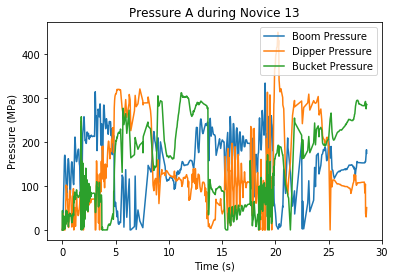

In [33]:
time = novice_data.iloc[0:1000,0]
plt.figure()
plt.plot(time,nBoom_Pressure_A)
plt.plot(time,nDipper_Pressure_A)
plt.plot(time,nBucket_Pressure_A)
plt.title('Pressure A during Novice 13')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend(['Boom Pressure','Dipper Pressure','Bucket Pressure'],loc='upper right')
plt.show()

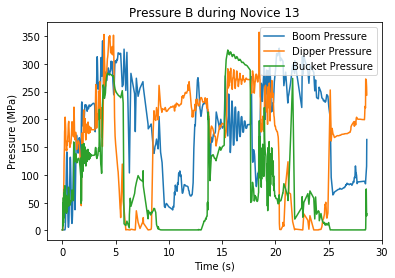

In [34]:
time = novice_data.iloc[0:1000,0]
plt.figure()
plt.plot(time,nBoom_Pressure_B)
plt.plot(time,nDipper_Pressure_B)
plt.plot(time,nBucket_Pressure_B)
plt.title('Pressure B during Novice 13')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend(['Boom Pressure','Dipper Pressure','Bucket Pressure'],loc='upper right')
plt.show()

In [342]:
expert_data = pd.read_csv('2ex15.csv')
inter_data = pd.read_csv('1int15.csv')
novice_data = pd.read_csv('2int4.csv')

#Descriptive statistics summary
df = DataFrame(novice_data)

#print(df.describe())
#print(df.mean()) 

df.loc[:,'DS_BoomCylinderPressureB'].describe()

count    2688.000000
mean      157.213767
std        82.621046
min         1.000000
25%        90.746809
50%       152.302192
75%       222.531995
max       346.277434
Name: DS_BoomCylinderPressureB, dtype: float64

In [343]:
df.loc[:,'DS_BoomCylinderPressureA'].describe()

count    2688.000000
mean      160.731230
std        61.291983
min         1.000000
25%       109.930886
50%       158.131290
75%       210.440218
max       360.091249
Name: DS_BoomCylinderPressureA, dtype: float64

In [344]:
df.loc[:,'DS_DipperCylinderPressureA'].describe()

count    2688.000000
mean       83.165005
std        79.051368
min         1.000000
25%        12.234976
50%        63.416252
75%       134.145593
max       498.615359
Name: DS_DipperCylinderPressureA, dtype: float64

In [345]:
df.loc[:,'DS_DipperCylinderPressureB'].describe()

count    2688.000000
mean      227.133010
std        76.628169
min         1.000000
25%       178.182477
50%       236.145312
75%       285.947698
max       356.189333
Name: DS_DipperCylinderPressureB, dtype: float64

In [346]:
df.loc[:,'DS_BucketCylinderPressureA'].describe()

count    2688.000000
mean       60.877756
std        45.728143
min         1.000000
25%        18.802230
50%        59.456902
75%        93.511062
max       292.852836
Name: DS_BucketCylinderPressureA, dtype: float64

In [347]:
df.loc[:,'DS_BucketCylinderPressureB'].describe()

count    2688.000000
mean      157.531612
std        62.403954
min         1.000000
25%       109.759271
50%       155.051686
75%       216.963522
max       296.022451
Name: DS_BucketCylinderPressureB, dtype: float64

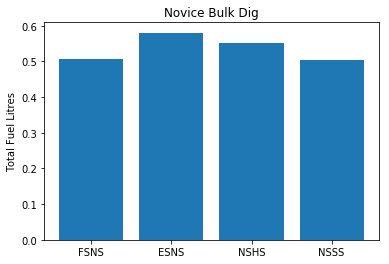

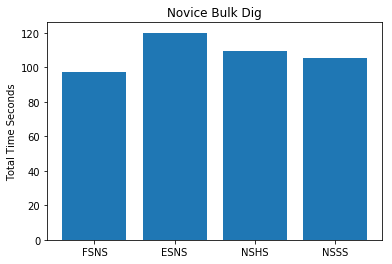

In [341]:

objects = ('FSNS','ESNS','NSHS','NSSS')
Fuel = [0.506271253,0.580355298,0.551927771,0.503691772]
Time = [97.1532,120.0156,109.5036,105.1392]

plt.bar(objects,Fuel)
plt.title('Novice Bulk Dig')
plt.ylabel('Total Fuel Litres')
plt.show()

plt.bar(objects,Time)
plt.title('Novice Bulk Dig')
plt.ylabel('Total Time Seconds')
plt.show()

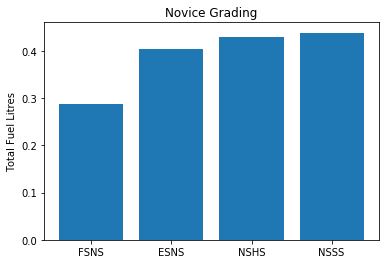

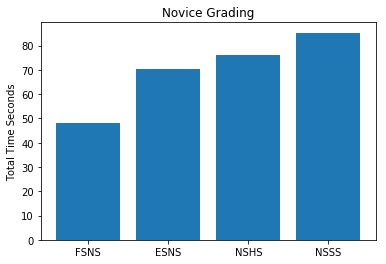

In [165]:
n_groups = 4
objects = ('FSNS','ESNS','NSHS','NSSS')
Fuel = [0.287520116,0.403726142,0.430172587,0.438371554]
Time = [47.9856,70.5312,75.9828,85.3212]

plt.bar(objects,Fuel)
plt.title('Novice Grading')
plt.ylabel('Total Fuel Litres')
plt.show()

plt.bar(objects,Time)
plt.title('Novice Grading')
plt.ylabel('Total Time Seconds')
plt.show()

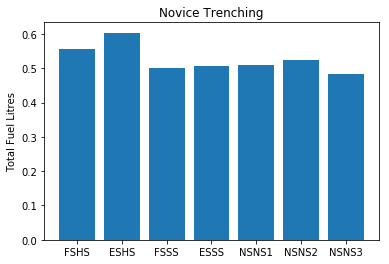

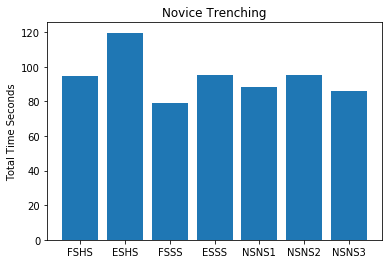

In [166]:
n_groups = 7
objects = ('FSHS','ESHS','FSSS','ESSS','NSNS1','NSNS2','NSNS3')
Fuel = [0.555546117,0.603542568,0.501747859,0.507204892,0.509062881,0.525077383,0.483388531]
Time = [94.4076,119.664,78.8472,95.232,88.0968,95.3916,85.7988]

plt.bar(objects,Fuel)
plt.title('Novice Trenching')
plt.ylabel('Total Fuel Litres')
plt.show()

plt.bar(objects,Time)
plt.title('Novice Trenching')
plt.ylabel('Total Time Seconds')
plt.show()

(-1e-05, 1e-05)

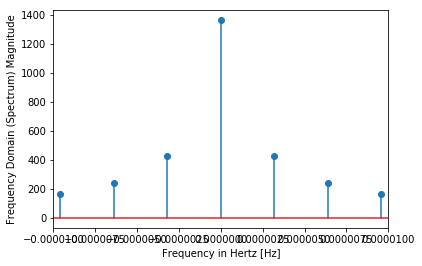

In [8]:
#Fast Fourier Transform = To look for common frequencies, peaks and interruptions
# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
import numpy as np
from scipy import fftpack

f_s = 1/60

X = fftpack.fft(expert_data.iloc[:,25])
freqs = fftpack.fftfreq(len(expert_data.iloc[:,25])) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-0.00001, 0.00001)
#ax.set_ylim(-5, 110)

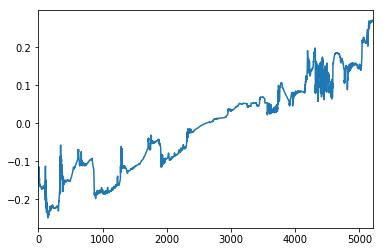

ADF Statistic: -0.095277
p-value: 0.949907
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [374]:
#Stationary to check for trends, like tiredness
# https://machinelearningmastery.com/time-series-data-stationary-python/
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
series = joysticks.iloc[:,0]
series.plot()
plt.show()

series = joysticks.iloc[:,0]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

-0.024418168781105552 -0.021894394289482057 -0.02407831804312764
0.011970631578136706 0.012050554361216168 0.012082520693961372


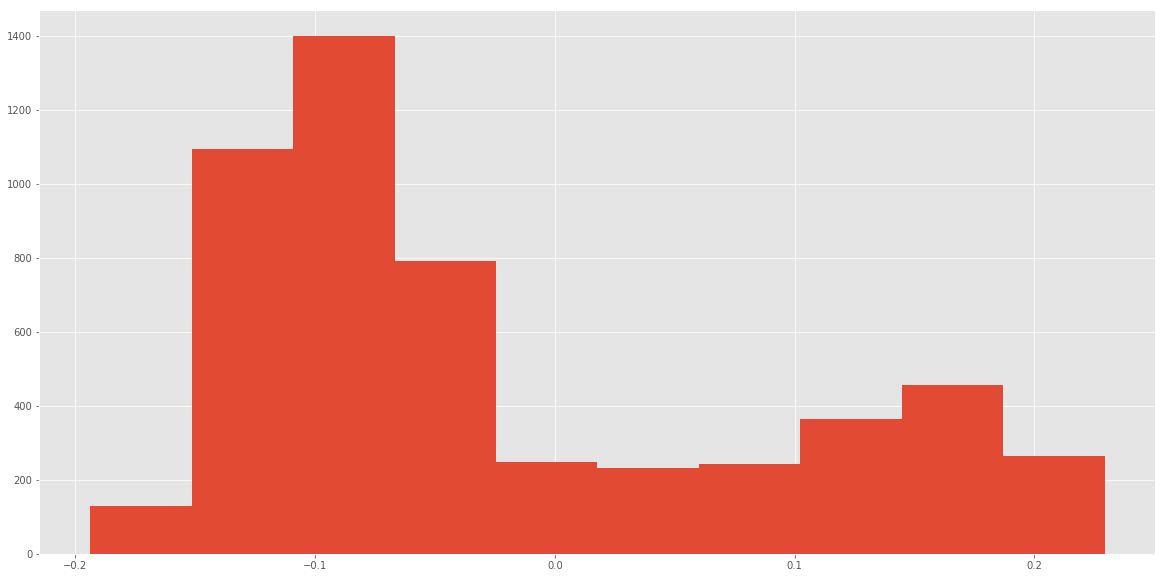

In [376]:
#Stationary tests using graphs; if it is stationary, we will have a normal distribution that is bell-shaped
# Checking the mean and variance across different data is useful
#https://pythondata.com/stationary-data-tests-for-time-series-forecasting/

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

#data = pd.read_csv('2ex13.csv')
#data['Datetime']=pd.to_datetime(data['Datetime'])
#data.set_index('Datetime', inplace=True)

expert_data.iloc[:,30].hist()

one, two, three = np.split(
        expert_data.iloc[:,30].sample(
        frac=1), [int(.25*len(expert_data.iloc[:,30])),
        int(.75*len(expert_data.iloc[:,30]))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print(mean1, mean2, mean3)
print(var1, var2, var3)


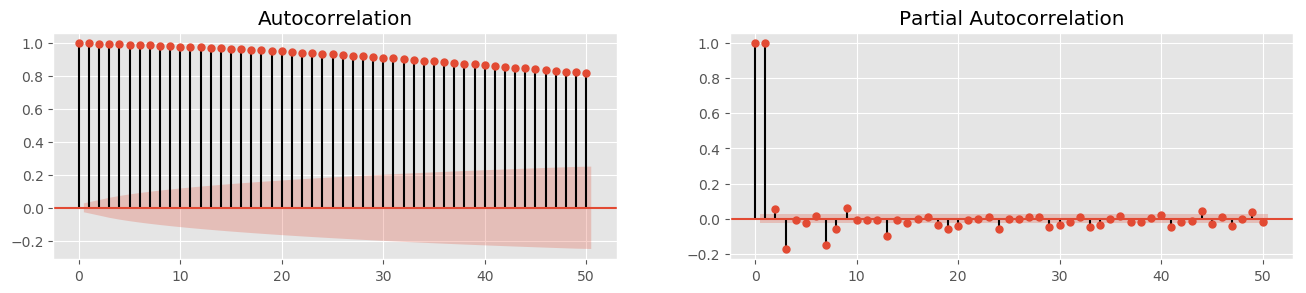

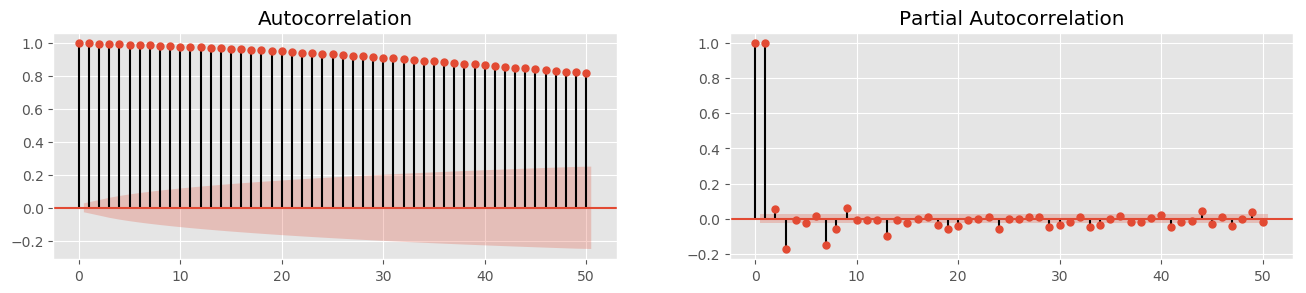

In [391]:
#Data correlation with Lag plots. More corr = easier prediction
#Autocorrelation https://www.machinelearningplus.com/time-series/time-series-analysis-python/
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import r2_score

df = expert_data.iloc[:,27]

fig,axes = plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(df,lags=50,ax=axes[0])
plot_pacf(df,lags=50,ax=axes[1])


In [392]:
#Entropy for estimating forecastibility https://www.machinelearningplus.com/time-series/time-series-analysis-python/
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(expert_data.iloc[:,30], m=2, r=0.2*np.std(expert_data.iloc[:,30])))     # 0.651
#print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537

0.08709606657674529
0.30871927392820053
0.7201487009875374


In [393]:
#Sample entropy https://www.machinelearningplus.com/time-series/time-series-analysis-python/
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(expert_data.iloc[:,30], m=2, r=0.2*np.std(expert_data.iloc[:,30])))      # 0.78

0.0631796483443141


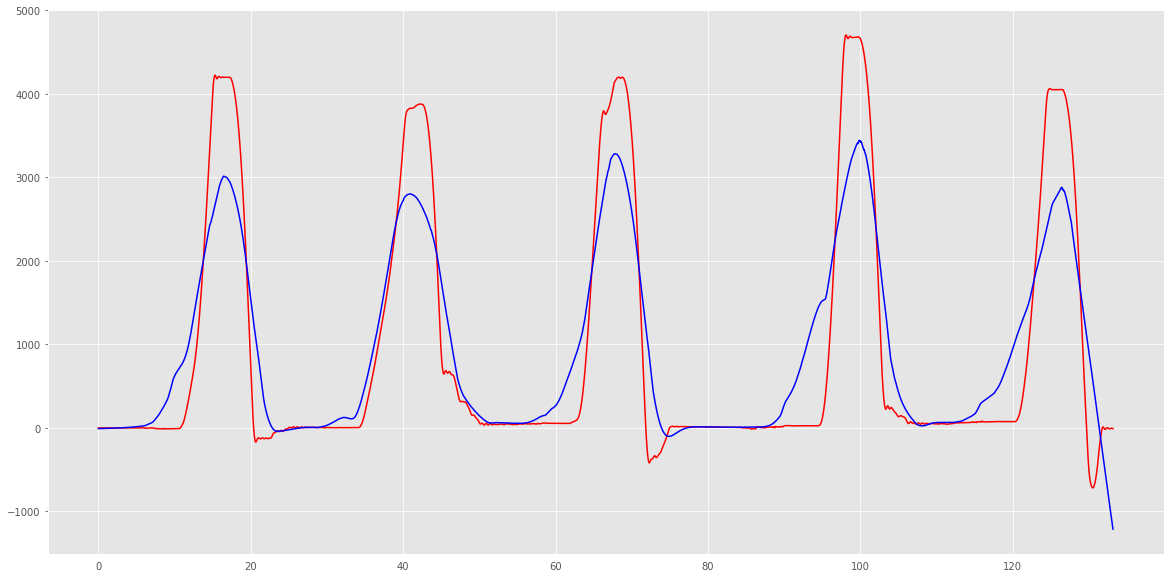

In [410]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

pressure = expert_data.iloc[:,30]
time = expert_data.iloc[:,0]

filtered = lowess(pressure, time, is_sorted=True, frac=0.1, it=0)

plt.plot(time, pressure, 'r')
plt.plot(filtered[:,0], filtered[:,1], 'b')


Text(0,0.5,'Pressure in MPa')

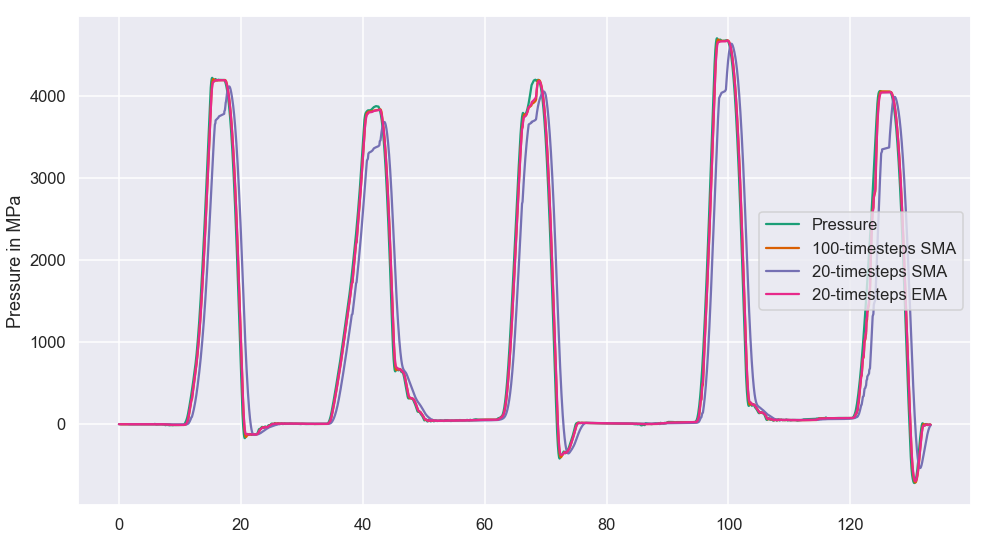

In [418]:
#Moving Average https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid', context='talk', palette='Dark2')
data = expert_data.iloc[:,30]
time = expert_data.iloc[:,0]

short_rolling = data.rolling(window=20).mean()
long_rolling = data.rolling(window=100).mean()
#Exponential MA
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(time,data, label='Pressure')
ax.plot(time,short_rolling, label = '100-timesteps SMA')
ax.plot(time,long_rolling, label = '20-timesteps SMA')
ax.plot(time,ema_short, label = '20-timesteps EMA')
ax.legend(loc='best')
ax.set_ylabel('Pressure in MPa')


In [422]:
#Granger Causality to see if one time series can predict another 
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
from statsmodels.tsa.stattools import grangercausalitytests
df = expert_data.iloc[:,[0,30]]

grangercausalitytests(df,maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3700  , p=0.0116  , df_denom=5212, df_num=1
ssr based chi2 test:   chi2=6.3736  , p=0.0116  , df=1
likelihood ratio test: chi2=6.3697  , p=0.0116  , df=1
parameter F test:         F=6.3700  , p=0.0116  , df_denom=5212, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4150  , p=0.2430  , df_denom=5209, df_num=2
ssr based chi2 test:   chi2=2.8326  , p=0.2426  , df=2
likelihood ratio test: chi2=2.8319  , p=0.2427  , df=2
parameter F test:         F=1.4150  , p=0.2430  , df_denom=5209, df_num=2


{1: ({'ssr_ftest': (6.369956186516754, 0.011636317850571742, 5212.0, 1),
   'ssr_chi2test': (6.373622700054658, 0.011582890035938976, 1),
   'lrtest': (6.369731041595514, 0.011608318841158056, 1),
   'params_ftest': (6.369956186320637, 0.011636317851855602, 5212.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.4149517069785784, 0.24303070287067713, 5209.0, 2),
   'ssr_chi2test': (2.8326197735405287, 0.24260761671685194, 2),
   'lrtest': (2.8318506107170833, 0.24270093704006424, 2),
   'params_ftest': (1.4149517105493103, 0.24303070200330854, 5209.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}